In [58]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# 设置 seaborn 或 matplotlib显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sb.set(font='SimHei')  # 解决Seaborn中文显示问题

# 数据

## 数据描述
id	
species：种类  
generation_id：版本  
height：高度	
weight：宽度	
base_experience：基础经验	
type_1：属性1	
type_2：属性2	
hp：生命值	
attack：攻击值	
defense：防御值	
speed：速度	
special-attack：特殊攻击值	
special-defense：特殊防御值

## 数据导入

In [3]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


# 条形图-绝对频率展示-sb.countplot

## 条形图展示

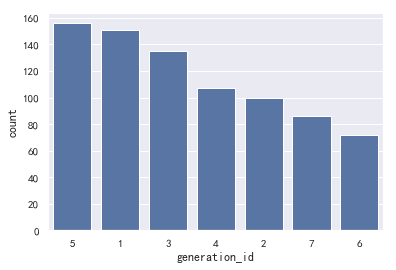

In [4]:
#设置基本颜色
base_color = sb.color_palette()[0]

#指定generation_id各个值的显示顺序
gen_order = pokemon['generation_id'].value_counts().index 

#显示generation_id变量各个值的分布情况
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order );

## 调整刻度值的显示角度

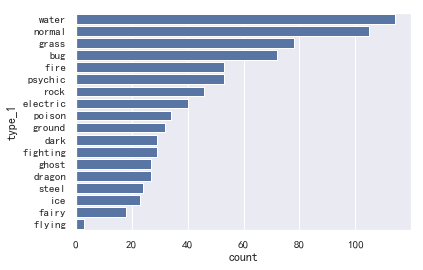

In [5]:
type_order = pokemon['type_1'].value_counts().index 
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order=type_order);
#更改绘制标签的方向
# plt.xticks(rotation = 90)

# 条形图-相对频率展示

## 数据合并

In [6]:
'''
    将'type_1', 'type_2'的值进行合并。
'''
pkmn_types = pokemon.melt(id_vars = ['id', 'species'], # 显示 保留字段
                          value_vars=['type_1', 'type_2'], # 将‘type_1', 'type_2'的字段的值进行合并。
                          var_name = 'type_level', #设置‘type_1', 'type_2'字段变量名称
                          value_name='type' # 设置‘type_1', 'type_2'值列名称
                         ).dropna() # 删除空值

In [7]:
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


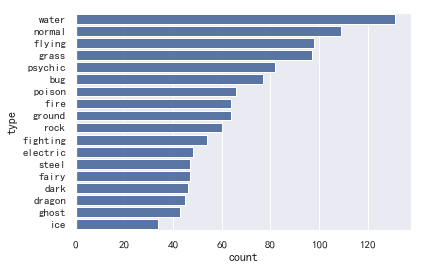

In [8]:
#对type值进行统计，并获取type值
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

#展示type个属性的频率情况
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order=type_order );

## 相对展示1

In [9]:
#获取pokemon数据行数
n_pokemon = pokemon.shape[0]
#取type类型中数量最多属性的值
max_type_count = type_counts[0]
#获得最大属性的占比
max_pro = max_type_count/n_pokemon

In [10]:
#生成刻度表
tick_props = np.arange(0, max_pro, 0.02)
#各属性占比-list数组
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

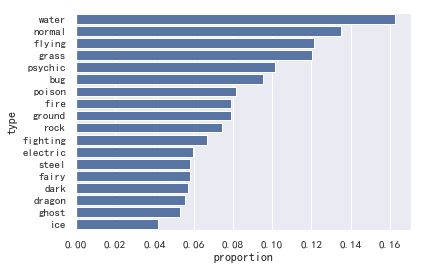

In [11]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order );
plt.xticks(tick_props * n_pokemon, tick_names) #plt.xticks(刻度值位置,刻度值)
plt.xlabel('proportion'); 

## 相对展示2

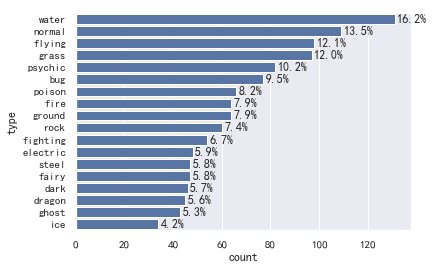

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order );

#循环type变量中每个属性的统计数量
for i in range(type_counts.shape[0]):
    #获得属性的统计数量
    count = type_counts[i]
    #获得属性的占比
    pct_string = '{:0.1f}%'.format(100 * count/ n_pokemon)    
    '''
    以文本形式向'条形图'中添加百分比数据，
        第一个参数表示‘百分比数据’的x轴位置
        第二个参数表示‘百分比数据’的y轴位置
        第三个参数表示‘百分比数据’的值
        第四个参数表示居中显示
    '''
    plt.text(count+1, i, pct_string, va = 'center') #x位置，y位置，输出的百分比，文本居中对齐

# 计算缺失的数据

In [13]:
#Seaborn 的 barplot 函数旨在描述一个定量变量相对于另一个定量变量级别的直观状况

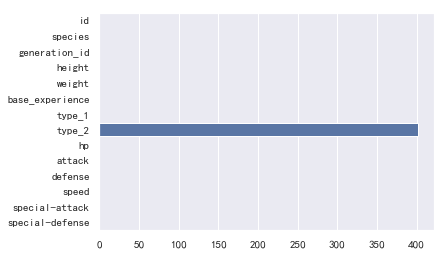

In [14]:
#每个字段含缺失值的数量
na_counts = pokemon.isna().sum()

base_color = sb.color_palette()[0]
#na_counts.index.values 表示每个字段
sb.barplot(na_counts, na_counts.index.values, color = base_color);

# 饼状图

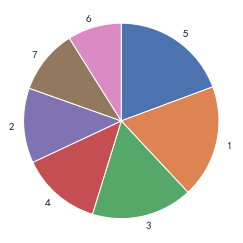

In [15]:
'''
"startangle = 90" 和 "counterclock = False" 表示在垂直上方开始第一个扇区，然后按照顺时针方向有序地绘制每个扇区。
'''
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, #值
        labels = sorted_counts.index, #标签
        startangle = 90, counterclock = False);
plt.axis('square'); #设置坐标轴为正方形

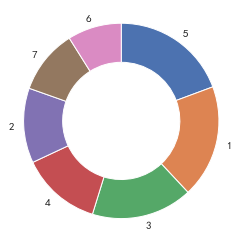

In [16]:
plt.pie(sorted_counts, 
        labels = sorted_counts.index, 
        startangle = 90, counterclock = False, 
        wedgeprops = {'width' : 0.4}#设置空心圆的大小
       );
plt.axis('square');

# 直方图

## plt.hist

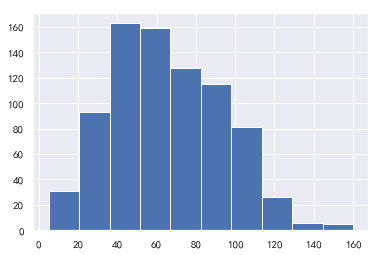

In [36]:
plt.hist(data = pokemon, x = 'speed');

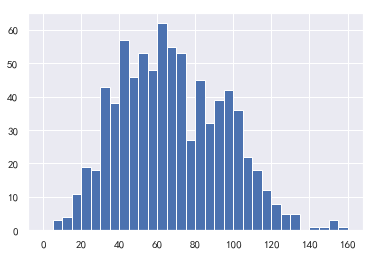

In [130]:
'''
Numpy 的函数 arange 创建了组距为 5的数组
第一个参数是最小值
第二个参数是最大值
第三个参数是组步长
'''
# 自定义组距
bins = np.arange(0, pokemon['speed'].max()+1, 5)

'''
matplotlib 默认把数据分为十组，而函数 hist 的参数 bins 来解决这个问题。
bins = 20 ，设置分组数量。
'''
plt.hist(data = pokemon, x = 'speed', bins = bins);

## sb.distplot

- distplot默认情会在数据上方绘制一个 (KDE) 核密度估计。
- **纵轴基于 KDE，而不是直方图.**
- **长条的高度之和不一定等于 1，但是曲线下方的面积应该等于 1。**



**默认情况**

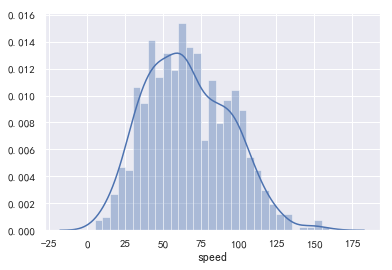

In [135]:
sb.distplot(pokemon['speed'],bins = bins );

**displot绘制直方图**

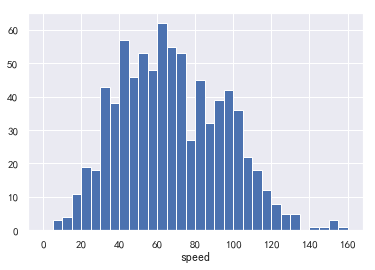

In [133]:
# 关闭密度曲线：kde = False
sb.distplot(pokemon['speed'],
             bins = bins, 
             hist_kws = {'alpha' : 1}, # 调整透明度
            kde = False );

**displot绘制KDE**

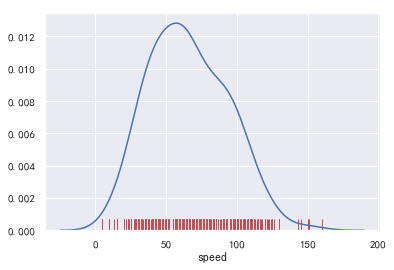

In [149]:
sb.distplot(pokemon['speed'], hist = False, rug = True, rug_kws = {'color' : 'r'},kde_kws = {'bw' : 10});

# Figures、Axes 和 Subplot


## 显式设置 Figure 和 Axes：

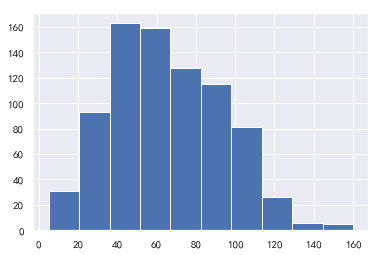

In [19]:
#创建Figure 对象
fig = plt.figure()
#在 Figure 中创建新的 Axes 对象
ax = fig.add_axes([.125, .125, .775, .755]) #[left, bottom, width, height] 
ax.hist(data = pokemon, x = 'speed');

## 子图表-subplot()

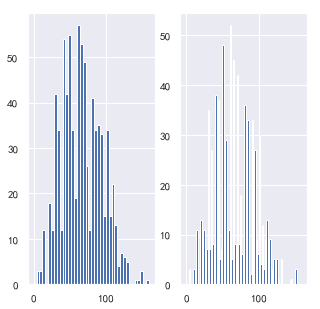

In [20]:
 # 创建一个新的 Figure
plt.figure(figsize = [5, 5]) # “figsize”设置宽和高

# 在 Figure 中创建一个新的 Axes，大小由 subplot() 函数参数确定
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1

bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# 第二个子图表槽位中创建一个新的 Axes，并将它设为当前 Axes。
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max(), 2)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

## 子图表-subplots()

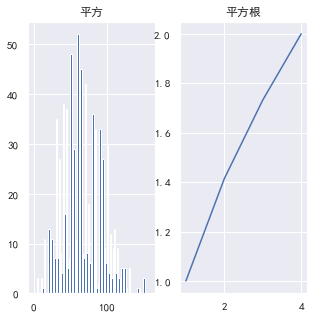

In [21]:
fig, a =  plt.subplots(1, 2, figsize = [5,5])
x = np.arange(1,5)
a[0].hist(data = pokemon, x = 'speed', bins = bin_edges);
a[0].set_title('平方')

a[1].plot(x,np.sqrt(x))
a[1].set_title('平方根');

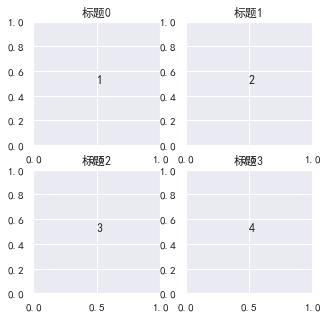

In [22]:
 # 设置子图表
fig, axes = plt.subplots(2, 2, figsize = [5,5])
# 将元素转换为一维数组
axes = axes.flatten()
for i in range(4):
    plt.sca(axes[i]) # 设置当前Axes
    plt.text(0.5, 0.5, i+1) #将值 设置到轴中央
    plt.title('标题'+str(i))

# 离散数据图形选择

将`条形边缘`设为`数据实际值之间的某个值`可以减少不确定性,和避免用户感到困惑。

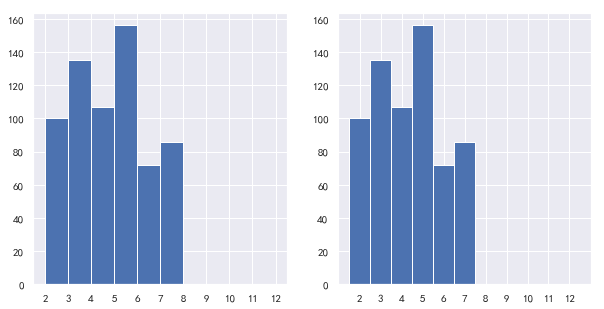

In [23]:
'''
np.arange(2, 12+1.1, 1)
[ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]   

np.arange(1.5, 12.5+1, 1)
[ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5]
'''

plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1, 1) # note `+1.1`, see below
plt.hist(pokemon['generation_id'], bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1) # note `+1.1`, see below
plt.hist(pokemon['generation_id'], bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

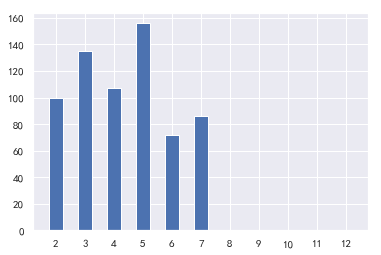

In [24]:
# 长条之间增加空隙，强调数据的值是离散的。
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(pokemon['generation_id'], bins = bin_edges, rwidth = 0.5) #  rwidth 设置条形宽度，以便增加空隙。
plt.xticks(np.arange(2, 12+1, 1));

# 离群值和坐标轴范围

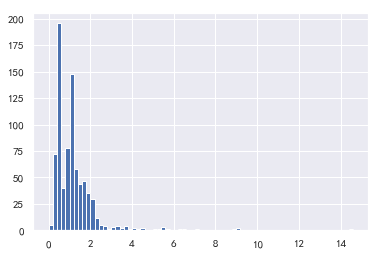

In [25]:
bins = np.arange(0, pokemon['height'].max()+0.2 , 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);

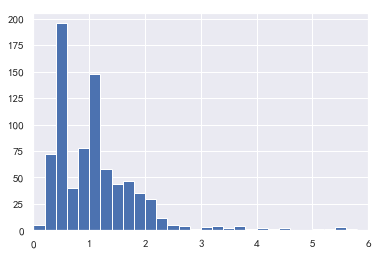

In [26]:
bins = np.arange(0, pokemon['height'].max()+0.2 , 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim(0, 6);#设置坐标轴范围的上限和下限

# 标尺转换

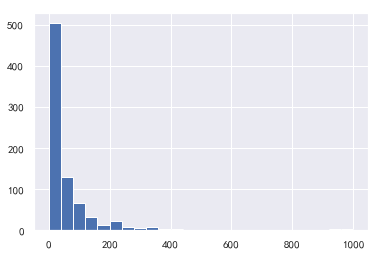

In [31]:
bins = np.arange(0, pokemon['weight'].max()+40 , 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

In [28]:
#查看数据对数信息
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

## 对数标尺变换1-plt.xscale

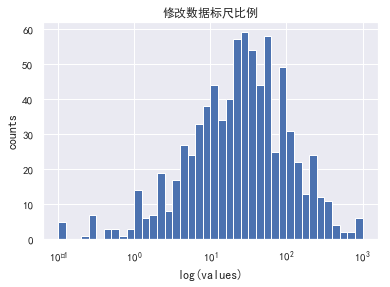

In [49]:
# 条形边界设在10的n次方，其中n在-1到3之间。
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);

#定义x轴数据的显示比例，这里将数据log对数显示
plt.xscale('log');

plt.xlabel('log(values)');
plt.ylabel('counts');
plt.title('修改数据标尺比例');

## 对数标尺变换2-np.log10

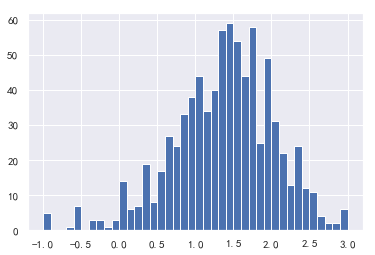

In [67]:
log_ln_data = np.log10(pokemon['weight'])
log_bin_edges = np.arange(-1, log_ln_data.max()+0.1, 0.1)
plt.hist(log_ln_data, bins = log_bin_edges);

## 修改对数x轴标签

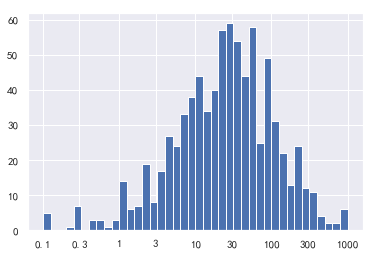

In [86]:
# 条形边界设在10的n次方，其中n在-1到3之间。
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')

# 
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks,ticks);

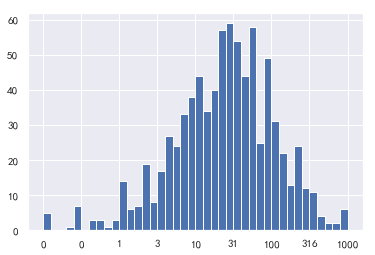

In [105]:
ln_data = np.log10(pokemon['weight'])
bin_edges = np.arange(-1, ln_data.max()+0.1, 0.1)
plt.hist(ln_data, bins = bin_edges);


#定义一个还原函数
def sqrt_trans(x):
        return 10 ** x

tick_locs =np.arange(-1, ln_data.max()+0.1, 0.5)
plt.xticks(tick_locs, sqrt_trans(tick_locs).astype(int));

# 核密度估计（KDE）

- `核密度估计`是**变量的概率密度函数的一种方式**。 
- **曲线下方面积等于1**
- **纵轴表示的是数据密度，而不是直接的概率。**

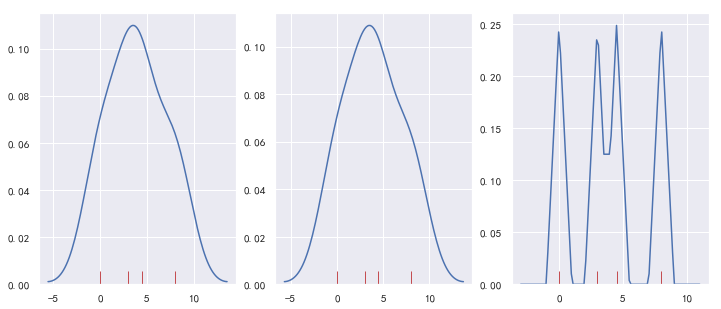

In [128]:
#  kde_kws = {'bw' : 1.9}  指定密度块体的宽度

data = [0.0, 3.0, 4.5, 8.0];
plt.figure(figsize = [12, 5]);

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1);
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'});

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2);
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.9}); 

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3);
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' :1, 'kernel' : 'tri'});